Расчет молекулярной массы пектина косвенным методом по определению вязкости растворов с помощью вискозиметра Уббелоде

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [62]:
data = pd.DataFrame(
    {
        'C': [0.02, 0.04, 0.06, 0.08, 0.10],
        'T1': [12.08, 13.48, 14.56, 15.79, 16.67],
        'T2': [12.17, 13.52, 14.65, 15.76, 16.68],
        'T3': [12.20, 13.55, 14.75, 15.76, 16.79]
    }
)

data

,C,T1,T2,T3
0,0.02,12.08,12.17,12.20
1,0.04,13.48,13.52,13.55
2,0.06,14.56,14.65,14.75
3,0.08,15.79,15.76,15.76
4,0.10,16.67,16.68,16.79


In [63]:
T_H2O = sum([10.88, 10.92, 10.78])/3
data['T'] = data[['T1', 'T2', 'T3']].mean(axis=1)
data = data.drop(['T1', 'T2', 'T3'], axis=1)
data['n_уд'] = (data['T']-T_H2O)/T_H2O
data['n_прив'] = data['n_уд']/data['C']
data['n_отн'] = data['T']/T_H2O
data['ln(n_отн)/C'] = np.log(data['n_отн'])/data['C']
data = data.round(2)

data

,C,T,n_уд,n_прив,n_отн,ln(n_отн)/C
0,0.02,12.15,0.12,5.94,1.12,5.61
1,0.04,13.52,0.24,6.12,1.24,5.47
2,0.06,14.65,0.35,5.82,1.35,4.99
3,0.08,15.77,0.45,5.65,1.45,4.66
4,0.10,16.71,0.54,5.39,1.54,4.31


Характеристическая вязкость = 6.26
R2 = 0.791


C:\Users\nadys\AppData\Local\Temp\ipykernel_1372\678620443.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylim(data.loc[4][3]+0.1, n+0.1)


(5.489999999999999, 6.359999999999999)

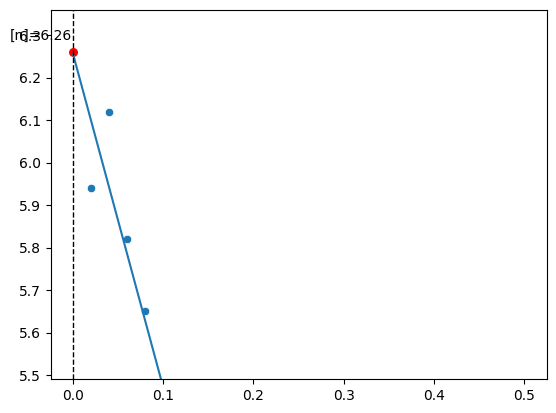

In [64]:
# from sklearn.preprocessing import PolynomialFeatures

X = data['C'].to_numpy().reshape(-1, 1)
y = data['n_прив'].to_numpy().reshape(-1, 1)

# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X=X, y=y)
y_pred = model.predict(X)

X_line = np.linspace(0, 0.5, 10).reshape(-1, 1)
y_pred_line = model.predict(X_line)

n = model.intercept_[0].round(2)
print(f'Характеристическая вязкость = {n}')
print(f'R2 = {r2_score(y, y_pred):.3f}')

# X_line = np.linspace(0, 0.5, 100).reshape(-1, 1)
# X_line_poly = poly.fit_transform(X_line)
# y_pred_line = model.predict(X_line_poly)

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n, color='red', s=30)
plt.text(-0.07, n + 0.03, f'[n]={n}', fontsize=10, color='black')
plt.ylim(data.loc[4][3]+0.1, n+0.1)

Характеристическая вязкость = 6.03
R2 = 0.982


C:\Users\nadys\AppData\Local\Temp\ipykernel_1372\667656371.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylim(data.loc[4][5]+0.1, n_ln+0.1)


(4.409999999999999, 6.13)

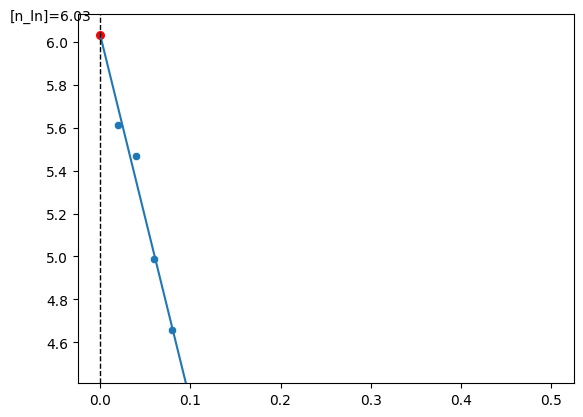

In [65]:
X = data['C'].to_numpy().reshape(-1, 1)
y_ln = data['ln(n_отн)/C'].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(X=X, y=y_ln)
y_ln_pred = model.predict(X)
X_ln_line = np.linspace(0, 0.5, 10).reshape(-1, 1)
y_ln_pred_line = model.predict(X_ln_line)

n_ln = model.intercept_[0].round(2)
print(f'Характеристическая вязкость = {n_ln}')
print(f'R2 = {r2_score(y_ln, y_ln_pred):.3f}')

sns.scatterplot(x=X.ravel(), y=y_ln.ravel())
sns.lineplot(x=X_ln_line.ravel(), y=y_ln_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n_ln, color='red', s=30)
plt.text(-0.1, n_ln + 0.07, f'[n_ln]={n_ln}', fontsize=10, color='black')
plt.ylim(data.loc[4][5]+0.1, n_ln+0.1)

[n] = 6.26 | Молекулярная масса = 52.16 кДа
[n_ln] = 6.03 | Молекулярная масса (ln) = 50.59 кДа
[n]ср = 6.14 | Молекулярная масса ср = 51.37 кДа

Таблица с данными:
      C      T  n_уд  n_прив  n_отн  ln(n_отн)/C
0  0.02  12.15  0.12    5.94   1.12         5.61
1  0.04  13.52  0.24    6.12   1.24         5.47
2  0.06  14.65  0.35    5.82   1.35         4.99
3  0.08  15.77  0.45    5.65   1.45         4.66
4  0.10  16.71  0.54    5.39   1.54         4.31


C:\Users\nadys\AppData\Local\Temp\ipykernel_1372\1729216945.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylim(data.loc[4][3]+0.1, n+0.1)


(5.489999999999999, 6.359999999999999)

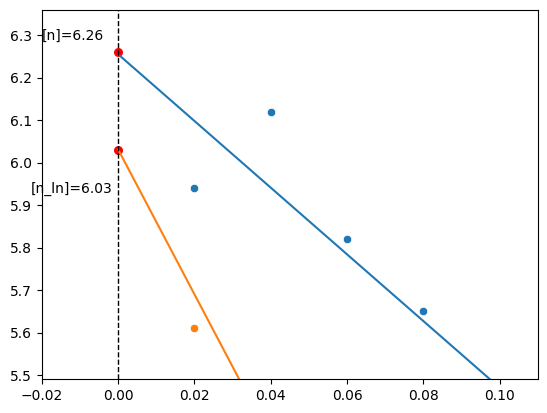

In [66]:
K = 1.1*10**(-5)
a = 1.22

MM = (n/K)**(1/1.22)/1000
print(f'[n] = {n} | Молекулярная масса = {MM:.2f} кДа')

MM_ln = (n_ln/K)**(1/1.22)/1000
print(f'[n_ln] = {n_ln} | Молекулярная масса (ln) = {MM_ln:.2f} кДа')

print(f'[n]ср = {(n+n_ln)/2:.2f} | Молекулярная масса ср = {(MM+MM_ln)/2:.2f} кДа')

print(f'\nТаблица с данными:\n{data}')

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())
sns.scatterplot(x=X.ravel(), y=y_ln.ravel())
sns.lineplot(x=X_ln_line.ravel(), y=y_ln_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n, color='red', s=30)
plt.scatter(0, n_ln, color='red', s=30)
plt.text(-0.02, n + 0.03, f'[n]={n:.2f}', fontsize=10, color='black')
plt.text(-0.023, n_ln - 0.1, f'[n_ln]={n_ln:.2f}', fontsize=10, color='black')
plt.xlim(-0.02, 0.11)
plt.ylim(data.loc[4][3]+0.1, n+0.1)

In [67]:
# расчет концентраций растворов пектина, при которых 1.1 < n_отн < 1.5

X = data['C'].to_numpy().reshape(-1, 1)
y = data['n_отн'].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

l = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1]
predictions = []
for i in l:
    y_1 = model.predict([[i]]).ravel()[0].round(2)
    predictions.append(y_1)

df = pd.DataFrame({
    'C': l,
    'n_отн': predictions
})
df


,C,n_отн
0,0.01,1.08
1,0.02,1.13
2,0.04,1.24
3,0.06,1.34
4,0.08,1.44
5,0.10,1.55
